In [4]:
%matplotlib inline

In [5]:
from pylab import *

B_ra = 165.03387 #Brightest galaxy coordinates
B_dec = 27.976953

In [6]:
H = 71 #km/s/Mpc

def redshift(y):
    '''Redshift from wavelength'''
    z = (y - 656.46)/656.46 # In nanometers
    return(z)

def velocity(z):
    '''Velocity from redshift'''
    v = (3*10**5)*(z) #km/s
    return(v)

def distance(v):
    '''Distance obtained Using Hubbles Constant and velocity'''
    d = v / H #in Mpc
    return(d)

V_sun = 4.83
    
def Vband(g,r):
    '''V-band apparent magnitude'''
    V = g - 0.565*(g-r) - 0.016
    return(V)

def Luminosity(V):
    '''Luminosity per solar unit'''
    L = 10**(-(V-V_sun)/2.5)
    return(L)

def Abs(V):
    '''Absolute Magnitude from Apparent Magnitude'''
    M = V - 5.0*(log10(98.0*10**5))
    return(M)

G = 6.6*10**-11
def M_dyn(V,R):
    'Dynamical Mass from Median velocity and radius'
    M_dyn = (5 * V**2 *R) / G
    return(M_dyn)

In [7]:
%cd C:\Users\elvin\Desktop\Calstate LA\4200 computational physics\Labs and Exercises\week 9
data = genfromtxt('Galaxy Redshift.csv', names = True,delimiter=',',unpack=True)
ra = data['ra'] - 194.9529
dec = data['dec'] - 27.9806 # Coma Cluster Coordinates 

C:\Users\elvin\Desktop\Calstate LA\4200 computational physics\Labs and Exercises\week 9


In [8]:
# degrees to radians
ra_rad = ra * pi/180.0
dec_rad = dec * pi/180.0


# radians to kiloparsecs
ra_kpc = ra_rad * (98.0*10**6)/1000 
dec_kpc = dec_rad *(98.0*10**6)/1000

In [18]:
gal_Halpha = 670.5 #nm

z = redshift(gal_Halpha)
v_gal = velocity(z)
print(("the redshift is %.7f and the velocity is %d km/s.") %(z,v_gal))

the redshift is 0.0213874 and the velocity is 6416 km/s.


In [10]:
# SDSS redshift is 0.0215017
# NED Velocity is 6495 km/s

z_compared = abs((z - 0.0215017)/0.0215017)*100
v_compared = abs((v_gal -6495) / 6495) * 100

print (z_compared, v_compared)



0.5313917832956461 1.2127402635975983


In [11]:
z_data = data['redshift']
v_data = velocity(z_data)

z_med = median(z_data)
print (z_med)


0.02337322


(array([ 2.,  8., 13., 24., 40., 32., 19.,  7.,  8.]),
 array([0.01240529, 0.01472129, 0.01703729, 0.01935329, 0.02166929,
        0.02398528, 0.02630128, 0.02861728, 0.03093328, 0.03324928]),
 <a list of 9 Patch objects>)

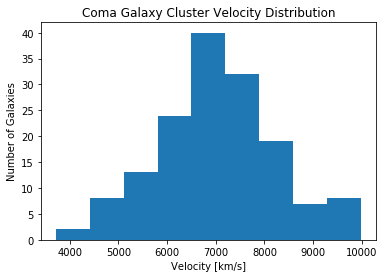

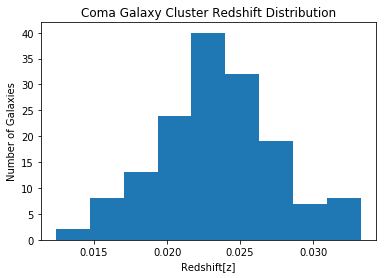

In [12]:
fig1 = figure()
title('Coma Galaxy Cluster Velocity Distribution')
xlabel('Velocity [km/s]')
ylabel('Number of Galaxies')
hist(v_data, bins = 9)
#savefig('Coma Galaxy Cluster Velocity Distribution.png')
fig2 = figure()
title('Coma Galaxy Cluster Redshift Distribution')
ylabel('Number of Galaxies')
xlabel('Redshift[z]')
hist(z_data, bins = 9)
#savefig('Coma Galaxy Cluster Redshift Distribution.png')

In [13]:
#Comparison of brightest galaxy from the cluster to the over all cluster.
v_median = median(v_data)
v_comp = v_gal / v_median
print (("V_gal/V_median = %.2f")%v_comp)
print (v_median)

V_gal/V_median = 0.92
7011.966


The velocity of NGC 4889 agrees very nicely with the median velocity of the over all data taken from the Coma Cluster.

In [14]:
dist_cluster = distance(v_median)
print (('The distance from the Coma Galaxy Cluster to the Earth is %.2f Mpc')%dist_cluster)

The distance from the Coma Galaxy Cluster to the Earth is 98.76 Mpc


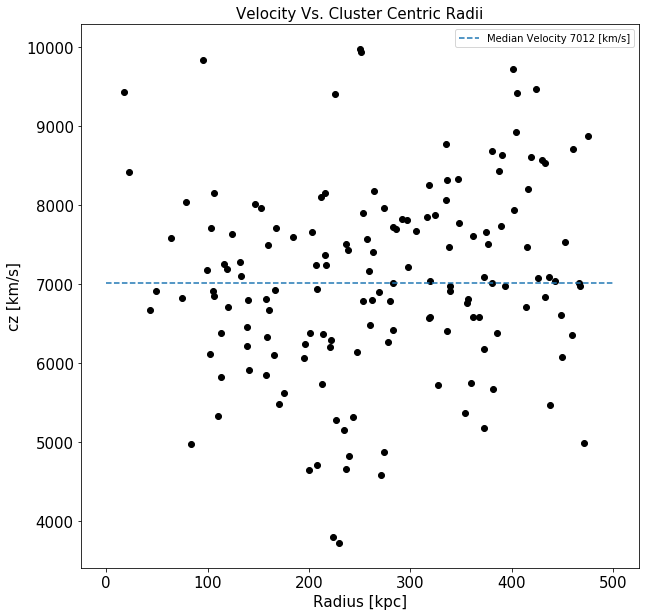

In [15]:
fig1 = figure(figsize=[10,10])
ax = gca()


R = sqrt((ra_kpc**2)+ (dec_kpc**2))


title('Velocity Vs. Cluster Centric Radii', fontsize = 15)
ylabel('cz [km/s]', fontsize = 15)
xlabel('Radius [kpc]', fontsize = 15)
ax.tick_params(labelsize = 15)
plot(R,v_data,'ok')
plot([0,500],[7012,7012],"--", label ='Median Velocity 7012 [km/s]')
legend(loc = 'best')
#savefig('Velocity Vs. Cluster Centric Radii.png')

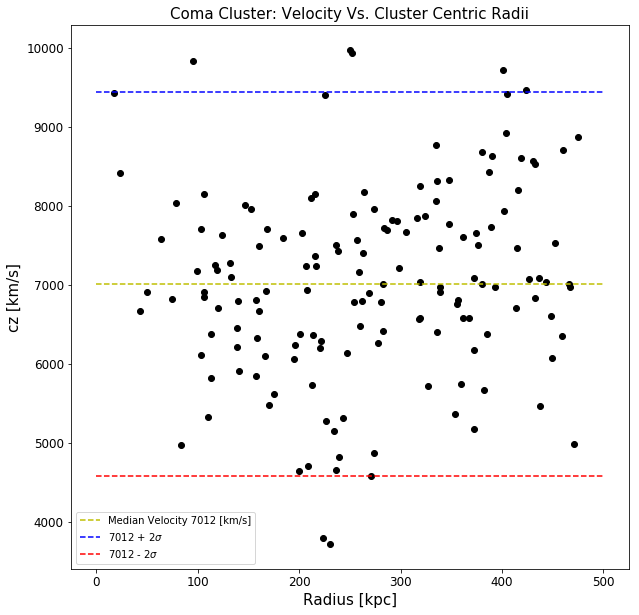

In [16]:
fig = figure(figsize = [10,10])
ax = gca()
v_std = std(v_data) #Sigma is 1212 km/s
std_pos = v_median + 2*v_std
std_neg = v_median - 2*v_std


title('Coma Cluster: Velocity Vs. Cluster Centric Radii', fontsize = 15)
ylabel('cz [km/s]', fontsize = 15)
xlabel('Radius [kpc]', fontsize = 15)
ax.tick_params(labelsize = 12)
plot(R,v_data,'ok')
plot([0,500],[7012,7012],"y--", label ='Median Velocity 7012 [km/s]')
plot([0,500],[std_pos,std_pos],'b--', label = '7012 + 2$\sigma$')
plot([0,500], [std_neg,std_neg],'r--', label = '7012 - 2$\sigma$')
legend(loc = 'best')
savefig('Velocity distribution.png')

In [17]:
g = data['g']
r = data['r']

V = Vband(g,r)
M_v = Abs(V)
L = Luminosity(M_v)

Mass = 2 * L
Mass_visible = sum(Mass) #2.09 * 10^12 Solar Masses
R_med = median(R)
R_km = R_med * ((3.08*10**16))#kpc to kilometers

Mdyn = M_dyn(v_std*1000,R_km*1000)/ (2.0*10**30) #G is in meters Mdyn = 4.51 * 10^14 Solar masses
M_ratio = Mdyn/Mass_visible
print (('The ratio of dark to visible mass is %.4f')%M_ratio)

The ratio of dark to visible mass is 214.9295
